In [1]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
sns.set_palette(sns.color_palette("hls", 11))

%matplotlib inline

In [2]:
data = joblib.load('./representations.joblib')
pca = joblib.load('./pca_representations.joblib')

In [3]:
data.keys()

dict_keys(['/ssdrive/WinEarthPhotosByKeyword/Day', '/ssdrive/WinEarthPhotosByKeyword/Volcano20Photos', '/ssdrive/WinEarthPhotosByKeyword/Aurora', '/ssdrive/WinEarthPhotosByKeyword/Structure', '/ssdrive/WinEarthPhotosByKeyword/Night', '/ssdrive/WinEarthPhotosByKeyword/Cupola75Photos', '/ssdrive/WinEarthPhotosByKeyword/Moon', '/ssdrive/WinEarthPhotosByKeyword/Stars60Photos', '/ssdrive/WinEarthPhotosByKeyword/DockUndock', '/ssdrive/WinEarthPhotosByKeyword/SunriseSunset', '/ssdrive/WinEarthPhotosByKeyword/Movies3of36PhotosEach'])

In [46]:
flatten = lambda l: [item for sublist in l for item in sublist]

X = []
labels = []
label2id = {}
for label, key in enumerate(data):
    for _ in data[key][0]:
        true_label = os.path.basename(key)
        label2id[true_label] = label
        labels.append(true_label)
    for x in data[key]:
        X.extend(x)

In [47]:
import os
os.path.basename(key)

'Movies3of36PhotosEach'

In [48]:
len(labels)

963

In [49]:
pca.shape

(963, 963)

In [67]:

import matplotlib.patches as mpatches
def plot_data(X, labels, title=''):
    
    # find 2 dim representation 
    tsne = TSNE(n_components=2)
    X_tsne = tsne.fit_transform(X)
    x, y = zip(*X_tsne)
    

    # plotting code 
    cm = []
    colors = sns.color_palette()
    for label in labels:
        idx = label2id[label]
        cm.append(colors[idx])
    plt.scatter(x,y,color=cm, marker='.')
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])
    patches = []
    for label in set(labels):
        patches.append( mpatches.Patch(color=colors[label2id[label]], label=label))
    lgd = plt.legend(handles=patches, loc='upper left', prop=dict(size=14), bbox_to_anchor=(1.02, 1))
    plt.title(title)
    plt.savefig('{}.png'.format(title), bbox_extra_artists=(lgd,), bbox_inches="tight")


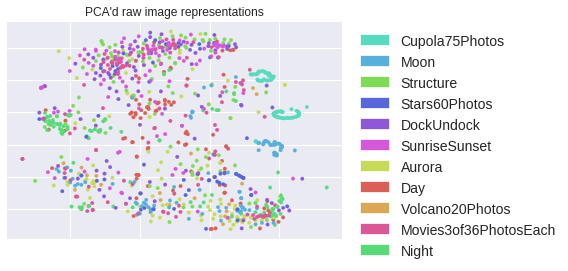

In [68]:
plot_data(pca, labels, "PCA'd raw image representations")

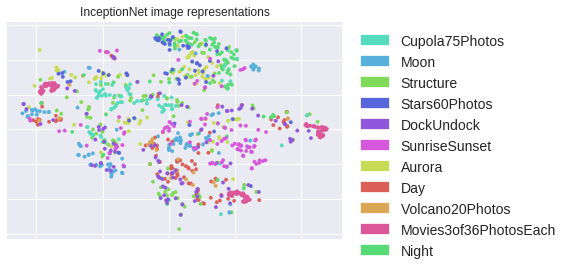

In [69]:
plot_data(X, labels, "InceptionNet image representations")

In [70]:
from sklearn.cluster import KMeans

In [113]:
kmeans = KMeans(n_clusters=50, n_jobs=-1)
pca_cluster = kmeans.fit_transform(pca)

In [118]:
kmeans = KMeans(n_clusters=50, n_jobs=-1)
inc_cluster = kmeans.fit_transform(X)

In [119]:
inc_cluster.shape

(963, 50)

In [123]:
import numpy as np
def purity_score(clusters, classes):
    
    A = np.c_[(clusters,classes)]

    n_accurate = 0.

    for j in np.unique(A[:,0]):
        z = A[A[:,0] == j, 1]
        x = np.argmax(np.bincount(z))
        n_accurate += len(z[z == x])

    return n_accurate / A.shape[0]

In [124]:
purity_score(kmeans.labels_.astype(int), np.array([label2id[l] for l in labels]).astype(int))

0.5503634475597092

In [125]:
from sklearn.metrics import accuracy_score
import numpy as np

def purity_score(y_true, y_pred):
    # matrix which will hold the majority-voted labels
    y_labeled_voted = np.zeros(y_true.shape)
    labels = np.unique(y_true)
    # We set the number of bins to be n_classes+2 so that 
    # we count the actual occurence of classes between two consecutive bin
    # the bigger being excluded [bin_i, bin_i+1[
    bins = np.concatenate((labels, [np.max(labels)+1]), axis=0)

    for cluster in np.unique(y_pred):
        hist, _ = np.histogram(y_true[y_pred==cluster], bins=bins)
        # Find the most present label in the cluster
        winner = np.argmax(hist)
        y_labeled_voted[y_pred==cluster] = winner

    return accuracy_score(y_true, y_labeled_voted)

In [126]:
purity_score(kmeans.labels_.astype(int), np.array([label2id[l] for l in labels]).astype(int))

0.22741433021806853